In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve,confusion_matrix,accuracy_score,precision_recall_fscore_support,f1_score,auc,r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import re
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
sns.set_theme(style = 'whitegrid')


In [ ]:
df = pd.read_csv('/content/insurance.csv')
print(df.shape)
df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


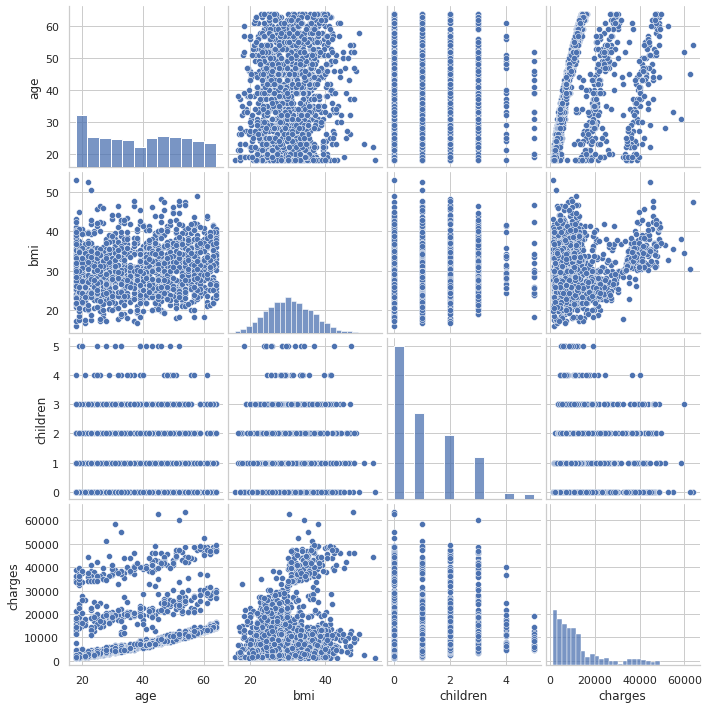

In [ ]:
# desribe the dataset (Exploratory data analysis) 
sns.pairplot(data = df)

In [ ]:
np.unique(df.sex,return_counts=True)

(array(['female', 'male'], dtype=object), array([662, 676]))

In [ ]:
np.unique(df.age ,return_counts=True)

(array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 array([69, 68, 29, 28, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 26, 26, 26,
        25, 25, 25, 25, 25, 27, 27, 27, 27, 27, 29, 29, 29, 29, 28, 29, 29,
        29, 28, 28, 26, 26, 26, 25, 25, 23, 23, 23, 23, 22]))

In [ ]:
np.unique(df.region,return_counts=True)

(array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object),
 array([324, 325, 364, 325]))

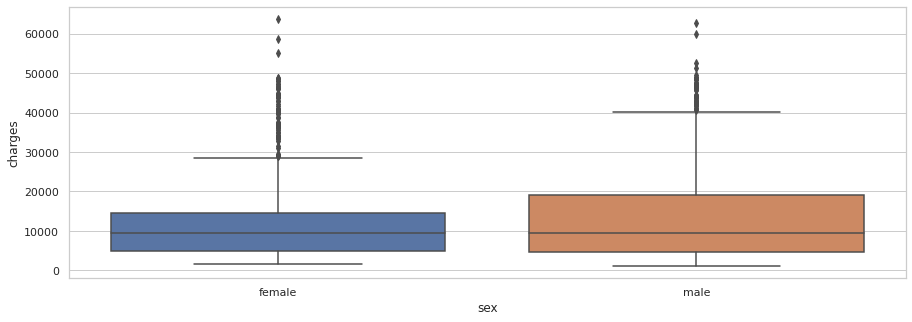

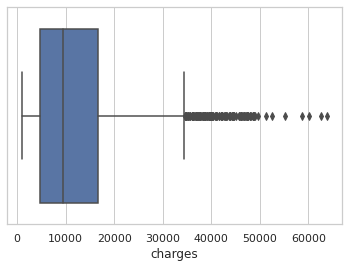

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,y='charges',x='sex')
plt.show()
sns.boxplot(data=df,x='charges')

In [ ]:
#Check for missing value
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

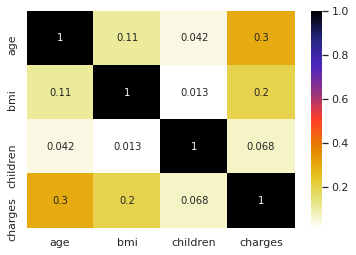

In [ ]:
# correlation plot
# l = ['Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r']
# RdYlGn
sns.heatmap(df.corr(),cmap='CMRmap_r',annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


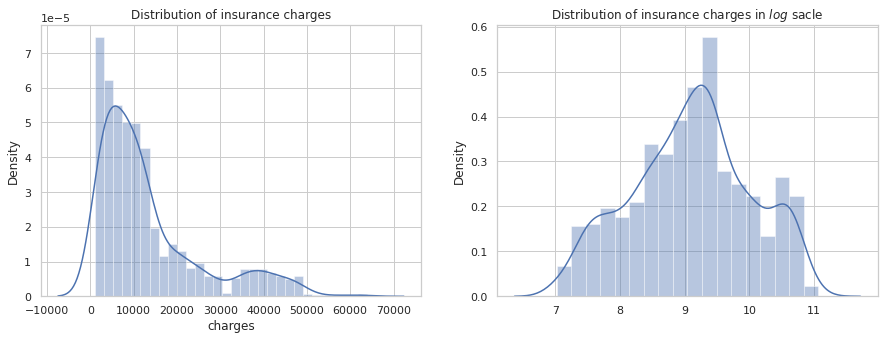

In [ ]:
#Plot the distribution of the dependent variable
f= plt.figure(figsize=(15,5))
ax=f.add_subplot(121)

ax.set_title('Distribution of insurance charges')
sns.distplot(df.charges)
ax=f.add_subplot(122)
ax.set_title('Distribution of insurance charges in $log$ sacle')
sns.distplot(np.log(df.charges.to_numpy()))

#Convert categorical data into numbers


*   Label Enocding
*   One hot Encoding


#Lable Encoding
Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

#One hot Encoding
A One hot encoding is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be 
more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer 
value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

You may take help of pandas get_dummies function for this. 

In [ ]:
# Log transform of dependent variable
# // sex smoker region
charge = df.charges
df = df.drop('charges',axis='columns')
sex_ = LabelEncoder()
smoker_ = LabelEncoder()
region_ = LabelEncoder()
df['gender'] = sex_.fit_transform(df.sex)
df['Smoker'] = smoker_.fit_transform(df.smoker)
df['Region'] = region_.fit_transform(df.region)
# a = pd.get_dummies(df.sex)
# b = pd.get_dummies(df.smoker)
# c = pd.get_dummies(df.region)
# df = pd.concat([df,a,b,c],axis=1)
df = df.drop(['sex','smoker','region'],axis=1)
df.head()

,age,bmi,children,gender,Smoker,Region
0,19,27.900,0,0,1,3
1,18,33.770,1,1,0,2
2,28,33.000,3,1,0,2
3,33,22.705,0,1,0,1
4,32,28.880,0,1,0,1


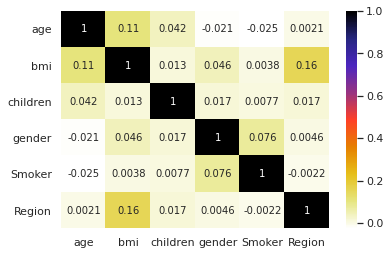

In [ ]:
sns.heatmap(df.corr(),cmap='CMRmap_r',annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


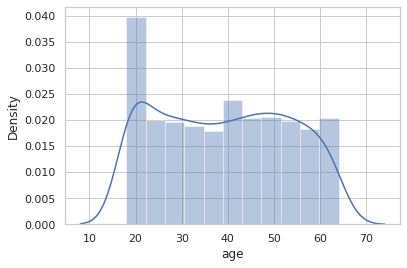

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


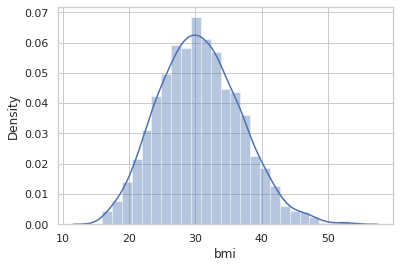

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


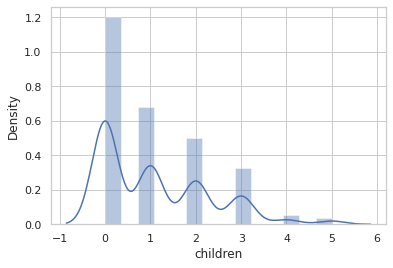

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


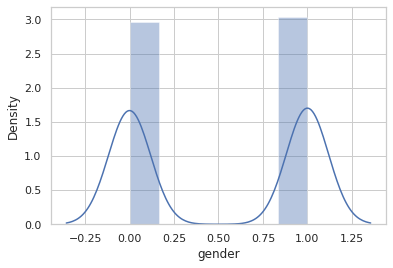

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


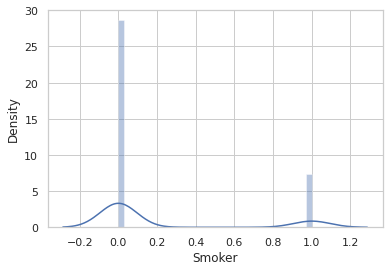

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


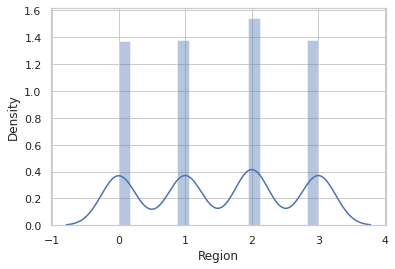

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


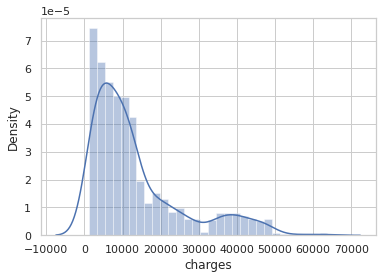

In [ ]:
for i in df.keys():
  sns.distplot(df[f'{i}'])
  plt.show()
sns.distplot(charge)


In [ ]:
print('skewness of distribution of dependent variable : ',skew(charge.to_numpy()))

skewness of distribution of dependent variable :  1.5141797118745743


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,age,bmi,children,gender,Smoker,Region
0,19,27.900,0,0,1,3
1,18,33.770,1,1,0,2
2,28,33.000,3,1,0,2
3,33,22.705,0,1,0,1
4,32,28.880,0,1,0,1


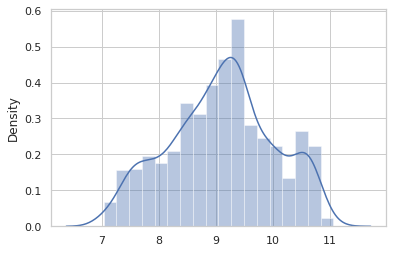

In [ ]:
# leaving bmi no no one is normal so normalizing all these 
some_df = df.describe().loc[['mean','std'],['age','children','gender','Smoker','Region']]
# for i in some_df.keys():
#   df[i] = np.log(np.array(df[i])+1)#log normalizing
charge = pd.Series(np.log(np.array(charge)+1))#log normalizing dependent features
sns.distplot(charge)
df.head()


In [ ]:
df.head()

,age,bmi,children,gender,Smoker,Region
0,19,27.900,0,0,1,3
1,18,33.770,1,1,0,2
2,28,33.000,3,1,0,2
3,33,22.705,0,1,0,1
4,32,28.880,0,1,0,1


In [ ]:
charge.to_frame().head()

,0
0,9.734236
1,7.453882
2,8.400763
3,9.998137
4,8.260455


In [ ]:
#Train Test split
x_train, x_test, y_train, y_test = train_test_split(df, charge, test_size=0.3,train_size=0.7,shuffle=False,random_state=42)
print(x_train.shape , y_train.shape)
print(x_test.shape,y_test.shape)

(936, 6) (936,)
(402, 6) (402,)


#Model building

In [ ]:
# Step 1: add x0 =1 to dataset
new_train = x_train.copy()
new_train.insert(0,'x0',value = np.ones(shape=(len(x_train))).astype('int'))
new_train.head()

,x0,age,bmi,children,gender,Smoker,Region
0,1,19,27.900,0,0,1,3
1,1,18,33.770,1,1,0,2
2,1,28,33.000,3,1,0,2
3,1,33,22.705,0,1,0,1
4,1,32,28.880,0,1,0,1


In [ ]:
X = np.matrix(new_train)
X.shape

(936, 7)

In [ ]:
Xt = np.transpose(X)
Xt.shape

(7, 936)

In [ ]:
xtx = np.matmul(Xt,X)
xtx.shape

(7, 7)

In [ ]:
xtxinv = np.linalg.inv(xtx)


In [ ]:
newmat = np.matmul(xtxinv,Xt)
newmat

matrix([[ 6.85330511e-03,  1.32088457e-03, -9.40313146e-04, ...,
         -2.63064658e-03, -4.58402466e-03,  1.52535809e-03],
        [-1.06494590e-04, -1.14903279e-04, -6.45969385e-05, ...,
          2.21906510e-05, -4.69149597e-05,  1.07670991e-04],
        [-8.81367185e-05,  1.02277974e-04,  5.74360641e-05, ...,
          9.95118544e-05,  1.83258933e-04, -1.57712362e-04],
        ...,
        [-2.54806421e-03,  2.02515565e-03,  2.01141102e-03, ...,
         -2.00592576e-03,  2.06743250e-03, -1.82903802e-03],
        [ 5.66170521e-03, -1.50256757e-03, -1.45183516e-03, ...,
         -1.12104353e-03, -1.46860684e-03, -1.13994840e-03],
        [ 1.36081329e-03,  3.13479771e-04,  3.46738679e-04, ...,
          1.19531642e-03,  2.54777378e-04,  1.39927359e-03]])

In [ ]:
coefmat = np.matmul(newmat,np.array(y_train))
coefmat
#first term is constant term and rest other terms are the coef terms for the feature

matrix([[ 6.97089616,  0.03589617,  0.01251378,  0.10170213, -0.09792497,
          1.55022515, -0.04229989]])

In [ ]:
def predict_(coef,args):
  a = coef[0,0]
  for i in range(len(args)):
    a += args[i]*coef[0,i+1]
  return a

In [ ]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
reg = LinearRegression(n_jobs=-1)
reg.fit(x_train,y_train)

#Parameter
print(reg.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'normalize': False}


In [ ]:
print(reg.coef_)
print(reg.intercept_)#clearly visible that it is same as that calculated manually above

[ 0.03589617  0.01251378  0.10170213 -0.09792497  1.55022515 -0.04229989]
6.970896161220618


In [ ]:
# tabular form
cool_dict = {f'{x_test.keys()[i]}':[reg.coef_[i],coefmat[0,i+1]] for i in range(len(x_test.keys()))}
cool_dict['intercept'] = [reg.intercept_,coefmat[0,0]]
tabular = pd.DataFrame(cool_dict,index=['using sklearn','manual'])
tabular


,age,bmi,children,gender,Smoker,Region,intercept
using sklearn,0.035896,0.012514,0.101702,-0.097925,1.550225,-0.0423,6.970896
manual,0.035896,0.012514,0.101702,-0.097925,1.550225,-0.0423,6.970896


#Model evaluation

In [ ]:
# prediction
l = []
for i in range(len(x_test)):
  l.append(predict_(coefmat,x_test.iloc[i,:]))
y_pred =  np.array(l)

# #Evaluvation: MSE (Write your MSE equation from scratch)
J_mse = 0
lendf = len(y_test)
t_test = y_test.reset_index(drop=True)
for i in range(lendf):
  alp = t_test[i]-y_pred[i]
  J_mse += (pow(alp,2))/lendf
print('accuracy : ',r2_score(y_test,y_pred))

accuracy :  0.7137316598713761


In [ ]:
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)

The Mean Square Error(MSE) or J(theta) is:  0.23469390589394057


In [ ]:
# sklearn regression module
y_pred_sk = reg.predict(x_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_test,y_pred_sk)
sklearn_reg_score = reg.score(x_test,y_test)
print(sklearn_reg_score)

0.7137316598713743


In [ ]:
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)

The Mean Square Error(MSE) or J(theta) is:  0.23469390589394232


In [ ]:
# so both the parameters are same and hence verified

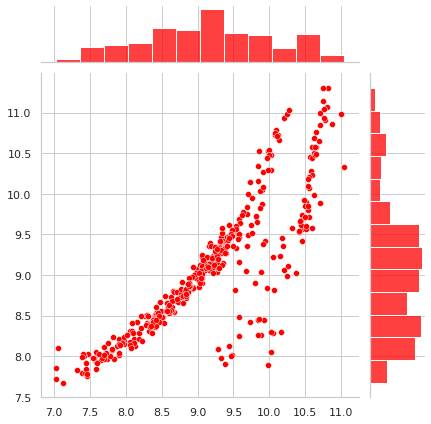

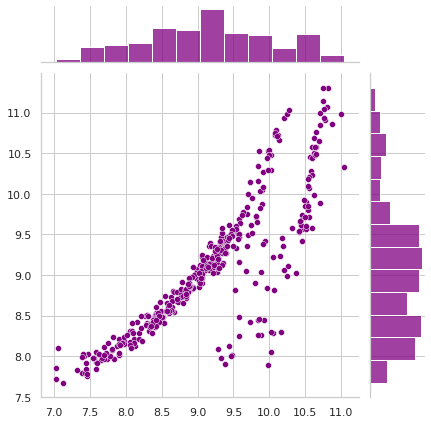

In [ ]:
# Check for Linearity

g = sns.jointplot(x=y_test,y=y_pred_sk,color='red')
plt.show()
sns.jointplot(x=y_test,y=y_pred,color='purple')

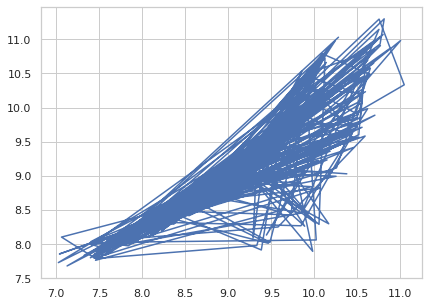

In [ ]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
ax.plot(y_test,y_pred_sk)

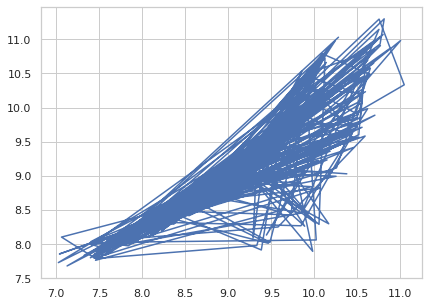

In [ ]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
ax.plot(y_test,y_pred)

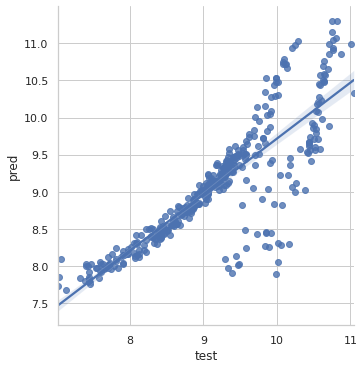

In [ ]:
dfdfdf = pd.DataFrame({'test':y_test,'pred':y_pred})
sns.lmplot(x='test',y='pred',data=dfdfdf)